In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apr_14=pd.read_csv(r'C:\Users\vidny\Downloads\uber_raw_data\uber-raw-data-apr14.csv')
may_14=pd.read_csv(r'C:\Users\vidny\Downloads\uber_raw_data\uber-raw-data-may14.csv')
jun_14=pd.read_csv(r'C:\Users\vidny\Downloads\uber_raw_data\uber-raw-data-jun14.csv')
jul_14=pd.read_csv(r'C:\Users\vidny\Downloads\uber_raw_data\uber-raw-data-jul14.csv')
aug_14=pd.read_csv(r'C:\Users\vidny\Downloads\uber_raw_data\uber-raw-data-aug14.csv')

In [3]:
merged_df = pd.concat([apr_14, may_14, jun_14, jul_14, aug_14]) #concatenating all the months
merged_df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [4]:
#  date and time 
apr_14['Date/Time'] = pd.to_datetime(apr_14['Date/Time'], format='%m/%d/%Y %H:%M:%S')
may_14['Date/Time'] = pd.to_datetime(may_14['Date/Time'], format='%m/%d/%Y %H:%M:%S')
jun_14['Date/Time'] = pd.to_datetime(jun_14['Date/Time'], format='%m/%d/%Y %H:%M:%S')
jul_14['Date/Time'] = pd.to_datetime(jul_14['Date/Time'], format='%m/%d/%Y %H:%M:%S')
aug_14['Date/Time'] = pd.to_datetime(aug_14['Date/Time'], format='%m/%d/%Y %H:%M:%S')

merged_df['Date/Time'] = pd.to_datetime(merged_df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [5]:
dfs = [apr_14, may_14, jun_14, jul_14, aug_14, merged_df]
current_df = dfs[0]

In [6]:
#converting date and time into integer
current_df['Time'] = current_df['Date/Time'].dt.time.apply(lambda x: int(x.strftime('%H%M%S')))
current_df

,Date/Time,Lat,Lon,Base,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1100
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1700
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2100
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2800
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,3300
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,232200
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,232600
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,233100
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,233200


<AxesSubplot:xlabel='Time', ylabel='Count'>

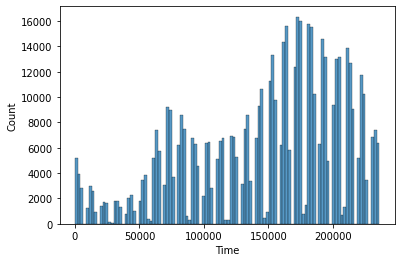

In [7]:
sns.histplot(current_df['Time'])  #plotting histogram

In [8]:
#separarting morning and evening data
morning_df_idx = (current_df['Time'] > 50000) & (current_df['Time'] < 110000)
morning_df = current_df[morning_df_idx]
evening_df_idx = (current_df['Time'] > 150000) & (current_df['Time'] < 220000)
evening_df = current_df[evening_df_idx]


In [9]:
morning_df

,Date/Time,Lat,Lon,Base,Time
30,2014-04-01 05:08:00,40.7141,-74.0094,B02512,50800
31,2014-04-01 05:12:00,40.7893,-73.9709,B02512,51200
32,2014-04-01 05:18:00,40.7747,-73.9910,B02512,51800
33,2014-04-01 05:19:00,40.7689,-73.9876,B02512,51900
34,2014-04-01 05:23:00,40.7744,-74.0149,B02512,52300
...,...,...,...,...,...
564028,2014-04-30 10:55:00,40.7665,-73.9514,B02764,105500
564029,2014-04-30 10:55:00,40.7266,-73.9076,B02764,105500
564030,2014-04-30 10:56:00,40.7365,-73.9816,B02764,105600
564031,2014-04-30 10:57:00,40.7710,-73.8659,B02764,105700


In [18]:
evening_df

,Date/Time,Lat,Lon,Base,Time
498,2014-04-01 15:02:00,40.7284,-74.0071,B02512,150200
499,2014-04-01 15:03:00,40.7079,-74.0093,B02512,150300
500,2014-04-01 15:04:00,40.7692,-73.9631,B02512,150400
501,2014-04-01 15:07:00,40.7644,-73.9530,B02512,150700
502,2014-04-01 15:08:00,40.7553,-73.9795,B02512,150800
...,...,...,...,...,...
564477,2014-04-30 21:55:00,40.7528,-73.9853,B02764,215500
564478,2014-04-30 21:55:00,40.7251,-74.0024,B02764,215500
564479,2014-04-30 21:58:00,40.7526,-73.9949,B02764,215800
564480,2014-04-30 21:58:00,40.7405,-74.0059,B02764,215800


In [17]:
morning_coordinates = morning_df[['Lat','Lon']].sample(10000,random_state = 10).values
evening_coordinates = evening_df[['Lat','Lon']].sample(10000,random_state = 10).values

# Folium 


In [12]:
# pip install folium  #for geospatial data

In [13]:
import folium

In [16]:
morning_map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 12, tiles='Stamen Toner')
for coordinate in morning_coordinates:
      folium.CircleMarker(radius=1,location=coordinate,fill=True).a.all(morning_map)
morning_map

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
evening_map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 12, tiles='Stamen Toner')
for coordinate in evening_coordinates:
  folium.CircleMarker(radius=1,location=coordinate,color="#FF0000",fill=True).add_to(evening_map)
evening_map

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Using k-means


In [20]:
from sklearn.cluster import KMeans
import numpy as np

In [21]:
#Finding clusters in morning dataframe
n_clusters = 6
model = KMeans(n_clusters=n_clusters, init='random', max_iter=300)
model.fit(morning_df[['Lat','Lon']])

KMeans(init='random', n_clusters=6)

In [22]:
morning_centroids = model.cluster_centers_
morning_centroids

array([[ 40.68789324, -73.96536965],
       [ 40.66317462, -73.77363599],
       [ 40.79325985, -73.86497079],
       [ 40.77337204, -73.96741693],
       [ 40.69828782, -74.20574989],
       [ 40.73293153, -73.99564178]])

In [23]:
for i, coordinate in enumerate(morning_centroids):
    folium.Marker(coordinate, popup='Centroid {}'.format(i+1), icon=folium.Icon(color='red')).add_to(morning_map)
morning_map

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
#Finding clusters in evening dataframe
n_clusters = 6
model = KMeans(n_clusters=n_clusters, init='random', max_iter=300)
model.fit(evening_df[['Lat','Lon']])

KMeans(init='random', n_clusters=6)

In [25]:
evening_centroids = model.cluster_centers_
evening_centroids

array([[ 40.65714118, -73.7743413 ],
       [ 40.79452144, -73.86948143],
       [ 40.76289723, -73.97456648],
       [ 40.68838102, -73.9681331 ],
       [ 40.7307095 , -73.99942559],
       [ 40.69961741, -74.20066416]])

In [26]:
for i, coordinate in enumerate(evening_centroids):
    folium.Marker(coordinate, popup='Centroid {}'.format(i+1), icon=folium.Icon(color='blue')).add_to(evening_map)
evening_map

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
#Finding clusters in whole selected dataframe
n_clusters = 8
model = KMeans(n_clusters=n_clusters, init='random', max_iter=300)
model.fit(current_df[['Lat','Lon']])

KMeans(init='random')

In [28]:
centroids = model.cluster_centers_
centroids

array([[ 40.75558304, -73.98157515],
       [ 40.78176107, -73.95912797],
       [ 40.97222233, -73.61633838],
       [ 40.65589767, -73.77951747],
       [ 40.72743971, -74.00041877],
       [ 40.68789545, -73.96455409],
       [ 40.70056661, -74.20165533],
       [ 40.78163496, -73.87044988]])

In [29]:
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 12, tiles='Stamen Toner')
for i, coordinate in enumerate(centroids):
    folium.Marker(coordinate, popup='Centroid {}'.format(i+1), icon=folium.Icon(color='blue')).add_to(map)
map

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
#new ride detection
new_ride = (40.70647056912189, -73.91116590442799)
folium.Marker(new_ride, popup='New Rider', icon=folium.Icon(color='green')).add_to(map)
map

In [31]:
centroid_idx = model.predict([new_ride])

In [32]:
centroids[centroid_idx]

array([[ 40.68789545, -73.96455409]])

In [33]:
folium.Marker(centroids[centroid_idx][0], icon=folium.Icon(color='yellow')).add_to(map)
map

<ipython-input-33-ffa6abe6ed74>:1: UserWarning: color argument of Icon should be one of: {'blue', 'orange', 'darkred', 'beige', 'red', 'lightred', 'darkgreen', 'darkpurple', 'lightblue', 'darkblue', 'pink', 'white', 'gray', 'black', 'green', 'purple', 'cadetblue', 'lightgreen', 'lightgray'}.
  folium.Marker(centroids[centroid_idx][0], icon=folium.Icon(color='yellow')).add_to(map)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()